### Calculate LFCA of OSISAF

hallo
hhhallo
1986 4
1986 5
(432, 432)


/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: Mean of empty slice


(43, 432, 432)
(43, 432, 432)


/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in greater


(69.77711153150983+0j)


/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in greater
/home/jdo043/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)
/home/jdo043/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 43, using nperseg = 43
  .format(nperseg, input_length))
/home/jdo043/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1818: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:194: RuntimeWarning: divide by zero encountered in true_divide
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: Mean of empty slice


(43, 432, 432)
(43, 432, 432)


/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:139: ComplexWarning: Casting complex values to real discards the imaginary part
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in greater


(73.3485701146937+0j)


/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in greater
/home/jdo043/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:2786: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)
/home/jdo043/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 43, using nperseg = 43
  .format(nperseg, input_length))
/home/jdo043/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1818: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:194: RuntimeWarning: divide by zero encountered in true_divide


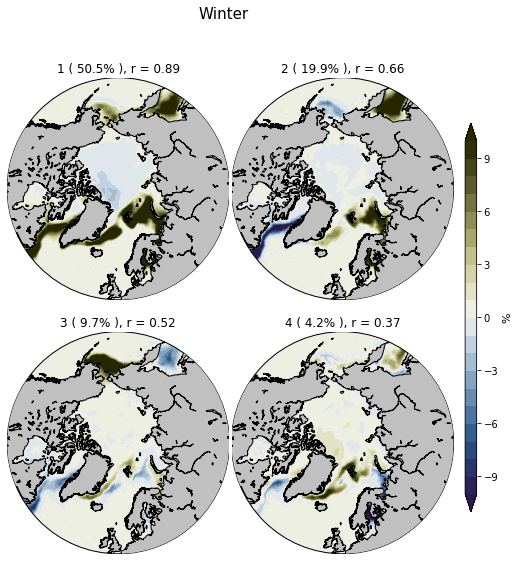

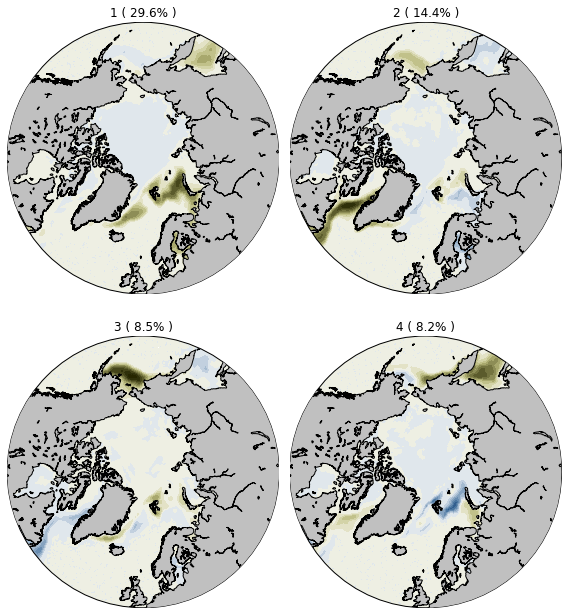

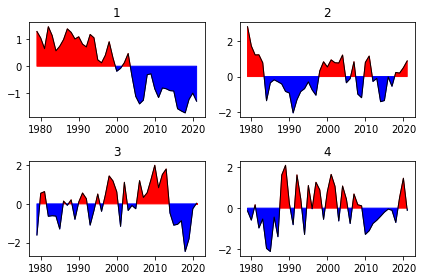

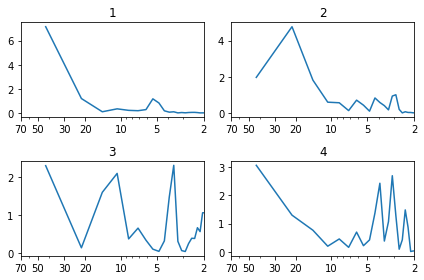

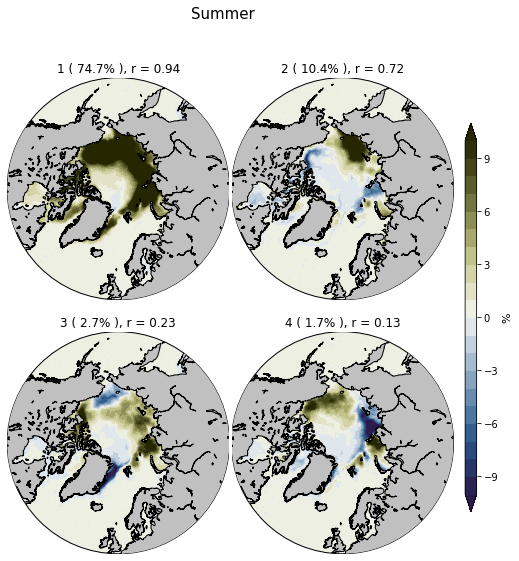

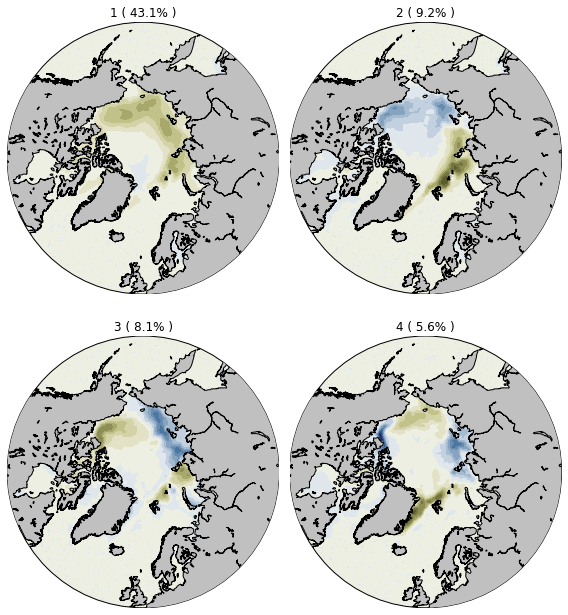

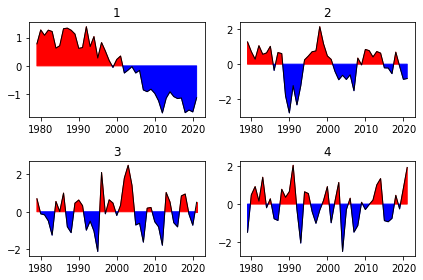

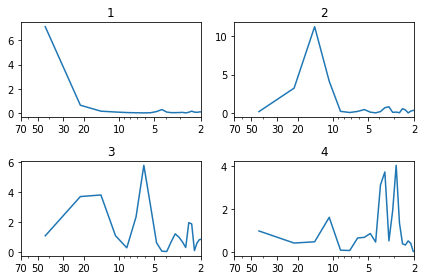

In [1]:
import sys
if '/home/jdo043/scripts/lfca/Python' not in sys.path:
    sys.path.append('/home/jdo043/scripts/lfca/Python')

from signal_processing import lfca
import numpy as np
from scipy import signal
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import matplotlib 


###########################################

path_to_osisaf_file = 'enter_path_here'
outpath = './'
cutoff = 10 # cutoffperiod for low-pass filtered data
truncation = 6 # number of leading EOFs retained
add_text = str(cutoff)+'yr_'+str(truncation)+'EOF'
n_plot = 2

seasons = [(0,3),(6,9)]
seasonnames = ['Winter','Summer']

##########################################
%matplotlib inline
rgbarray1 = np.genfromtxt('cryo_div.txt')
cmap_div = matplotlib.colors.LinearSegmentedColormap.from_list("", np.flip(rgbarray1,0))

### read in sea-ice concentration
period = range(1979,2022)
m = Basemap(resolution='l',projection='npstere',lon_0=0,boundinglat=50., round=True)

ice_file = Dataset(path_to_osisaf_tile)
ice_conc = ice_file.variables['sic'][0:-6,:,:].data * 100
ice_conc[ice_conc<0] = np.nan
lat = ice_file.variables['lat'][:,:]  
lon = ice_file.variables['lon'][:,:]

time = np.squeeze(num2date(ice_file.variables['time'][:].copy(),
                           ice_file.variables["time"].units,
                           calendar = ice_file.variables["time"].calendar))[:]
yearmonth = [100*t.year + t.month for t in time]

raw_sic = np.zeros((len(period)*12,ice_conc.shape[1],ice_conc.shape[2])) * np.nan
i = 0
for y,year in enumerate(period):
    for month in range(1,13):
        try:
            index = yearmonth.index(100*year + month)
            raw_sic[i,:,:] = ice_conc[index,:,:]
        except:
            print(year,month)
        i += 1

len_sic = int(raw_sic.shape[0]/12)

# gridarea
areafile = Dataset('osisaf_gridarea.nc')
area = np.squeeze(areafile.variables['gridarea'][:])
area = area[0::every_other,0::every_other]
area[np.nanmean(raw_sic,(0,1))==0] = 0


for i_s,season in enumerate(seasons):
    ## cut out season from sic data
    sic = np.array([np.nanmean(raw_sic[12*t+season[0]:12*t+season[1],:,:],0)
           for t in range(len_sic)])
    #
    area[np.where(np.isnan(np.mean(sic,0)))] = 0
    print(sic.shape)
    # change domain
    domain = np.ones(area.shape)
    domain[lat<40] = 0

    for period in [range(0,43)]:
        yrs = years[period]
        ice = sic[period,:]
        s = ice.shape
        print(s)

        order = 'C'
        x = np.reshape(ice,(s[0],s[1]*s[2]),order=order)
        area_weights = np.reshape(area,(1,s[1]*s[2]),order=order)
        domain = np.reshape(domain,(1,s[1]*s[2]),order=order)

        icol_ret = np.where((area_weights!=0) & (domain!=0))
        icol_disc = np.where((area_weights==0) | (domain==0))
        x = x[:,icol_ret[1]]
        #x = signal.detrend(x,0)
        area_weights = area_weights[:,icol_ret[1]]
        normvec = np.transpose(area_weights)/np.sum(area_weights)
        scale = np.sqrt(normvec)
        #%%

        lfcs, lfps, weights, r, pvar, pcs, eofs, ntr, pvar_slow, pvar_lfc, r_eofs, pvar_slow_eofs = \
        lfca(x, cutoff, truncation, scale)

        nins = np.size(icol_disc[1])
        nrows = lfps.shape[0]
        lfps_aug = np.zeros((nrows,lfps.shape[1]+nins))
        lfps_aug[:] = np.nan
        lfps_aug[:,icol_ret[1]] = lfps
        nrows = eofs.shape[0]
        eofs_aug = np.zeros((nrows,eofs.shape[1]+nins))
        eofs_aug[:] = np.nan
        eofs_aug[:,icol_ret[1]] = eofs
        #%%

        print(np.sum(pvar[0:truncation]))
        fig = plt.figure(figsize=(8,9))
        for i in range(min(truncation,n_plot*n_plot)):
            plt.subplot(n_plot,n_plot,i+1)
            pattern = np.reshape(lfps_aug[i,...],(s[1],s[2]),order=order)
            pattern[np.where(np.abs(pattern)>1.e5)] = np.nan

            p = m.contourf(lon,lat,pattern, np.arange(-10,11,1),\
                         cmap=cmap_div,latlon=True,extend='both')
            m.drawcoastlines()
            m.fillcontinents(color='silver',lake_color='silver')
            #plt.colorbar()
            plt.title(str(i+1)+ ' ( '+str(np.round(pvar_slow[i].real,1))+'% ), r = '+str(np.round(r[i],2)))
        plt.suptitle(seasonnames[i_s]+'\n\n',fontsize=15)
        cbar_ax1 = fig.add_axes([0.92, 0.2, 0.02, 0.6])
        c = fig.colorbar(p, cax=cbar_ax1,orientation='vertical',
                 spacing='proportional')
        c.set_label(label='%',size=11)
        plt.subplots_adjust(hspace=0.08,wspace=0.01,right=0.9)

        plt.figure(figsize=(8,9))
        for i in range(min(truncation,n_plot*n_plot)):
            plt.subplot(n_plot,n_plot,i+1)
            pattern = np.reshape(eofs_aug[i,...],(s[1],s[2]),order=order)
            pattern[np.where(np.abs(pattern)>1.e5)] = np.nan

            m.contourf(lon,lat,pattern, np.arange(-10,11,1),\
                         cmap=cmap_div,latlon=True,extend='both')
            m.drawcoastlines()
            m.fillcontinents(color='silver',lake_color='silver')
            #plt.colorbar()
            plt.title(str(i+1)+ ' ( '+str(np.round(pvar[i].real,1))+'% )')
            
        plt.tight_layout()
        
        plt.figure()
        for i in range(min(truncation,n_plot*n_plot)):
            plt.subplot(n_plot,n_plot,i+1)
            plt.plot(yrs,lfcs[:,i],'k',linewidth=1)
            plt.fill_between(yrs,0,lfcs[:,i].real,where = lfcs[:,i] >= 0,color='r', interpolate = True)
            plt.fill_between(yrs,0,lfcs[:,i].real,where = lfcs[:,i] <= 0,color='b', interpolate = True)
            plt.title(i+1)
        plt.tight_layout()
        np.save(outpath+'LFCA_PCs_OSISAF_'+add_text+'_'+seasonnames[i_s]+'.npy',lfcs.data)
        plt.figure()
        for i in range(min(truncation,n_plot*n_plot)):
            plt.subplot(n_plot,n_plot,i+1)
            f,Px = signal.welch(lfcs[:,i],1)
            plt.semilogx(1/f,Px)
            plt.xlim(2,70)
            plt.gca().invert_xaxis()
            plt.xticks([70,50,30,20,10,5,2],[70,50,30,20,10,5,2])
            plt.title(i+1)
        plt.tight_layout()
    lfca_patterns = np.reshape(lfps_aug[0:6,:],(6,s[1],s[2]),order=order)
    np.save(outpath+'LFCA_patterns_OSISAF_'+add_text+'_'+seasonnames[i_s]+'.npy',lfca_patterns.data)
    np.save(outpath+'LFCA_r_OSISAF_'+add_text+'_'+seasonnames[i_s]+'.npy',r.data)
    np.save(outpath+'LFCA_pvar_slow_OSISAF_'+add_text+'_'+seasonnames[i_s]+'.npy',pvar_slow.data)

### Fig. 2: Plot patterns of LFCA

/home/jdo043/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/jdo043/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


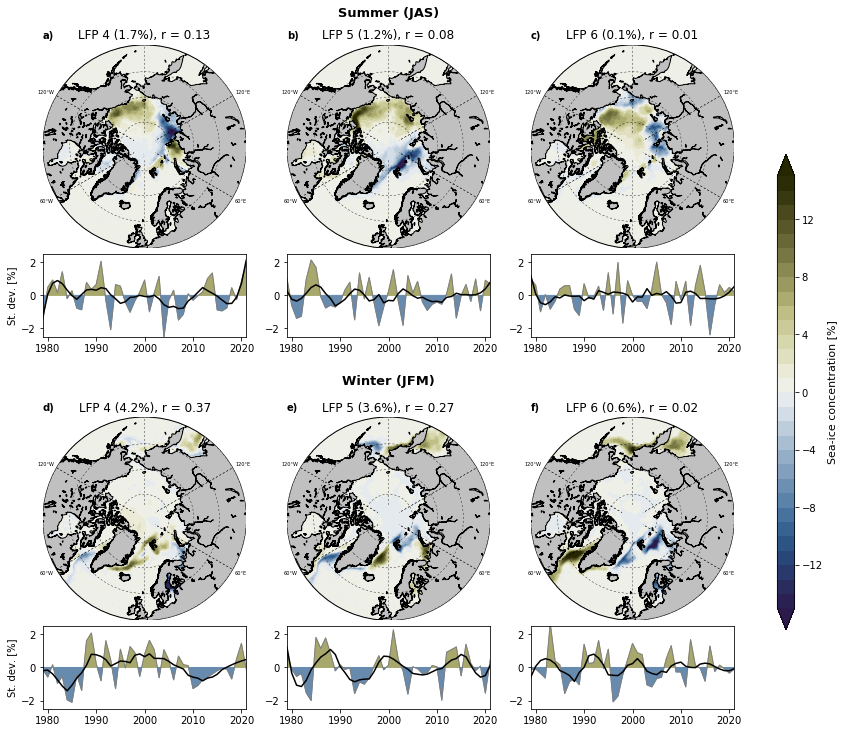

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Jun 22 11:48:37 2021

@author: jakobdorr
"""
import numpy as np
from scipy import signal
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.gridspec as gridspec
from scipy.signal import savgol_filter

inpath = '../../data/'
%matplotlib inline
every_other = 1
ice_file = Dataset(path_to_osisaf_file)
letters = ['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)']
lat = ice_file.variables['lat'][0::every_other,0::every_other]
lon = ice_file.variables['lon'][0::every_other,0::every_other]
yrs = np.arange(1979,2022)
rgbarray1 = np.genfromtxt('cryo_div.txt')
cmap_div = matplotlib.colors.LinearSegmentedColormap.from_list("", np.flip(rgbarray1,0))

m = Basemap(resolution='l',projection='npstere',lon_0=0,boundinglat=50., round=True)

name = 'OSISAF_10yr_6EOF'
seasons = ['Summer','Winter']
seasonname = {'Summer':'Summer (JAS)','Winter':'Winter (JFM)','Annual':'Annual'}
PCs = {}
patterns = {}
levels = list(range(-10,0))+[-0.1,0.1]+list(range(1,11))
fig = plt.figure(figsize=(12,11))
gs = gridspec.GridSpec(10, 3,figure=fig)
for i,season in enumerate(seasons):
    for pt in range(3):
        ax = fig.add_subplot(gs[i*5:i*5+5, pt])
        r = np.load(outpath+'LFCA_r_'+name+'_'+season+'.npy')[pt+3]
        pvar_slow = np.load(outpath+'LFCA_pvar_slow_'+name+'_'+season+'.npy')[pt+3]
        PC = np.load(outpath+'LFCA_PCs_'+name+'_'+season+'.npy')[:,pt+3]
        pattern = np.load(outpath+'LFCA/LFCA_patterns_'+name+'_'+season+'.npy')[pt+3,:]
        
        p = m.contourf(lon,lat,pattern,levels = range(-15,16,1),
                   cmap=cmap_div,latlon=True,extend='both')
        m.drawcoastlines()
        m.drawmeridians(range(0,360,60),labels=[0,0,0,0],linewidth=0.4,latmax=85,dashes=[5,5],fontsize=5)
        m.drawmeridians([60,120,240,300],labels=[1,1,1,1],linewidth=0.4,latmax=85,dashes=[5,5],fontsize=5)
        m.drawparallels([50,60,70,80],linewidth=0.4,dashes=[5,5],fontsize=5)
        m.fillcontinents(color='silver',lake_color='silver')
        if pt == 1:
            fig.text(0.45,0.44+0.465*(1-i),seasonname[season]+'\n',
                     fontweight='bold',ha='center',fontsize=13)
        plt.title('LFP '+str(pt+1+3)+ ' ('+str(np.round(pvar_slow.real,1))+'%), r = '+str(np.round(r,2)))
        plt.text(0,1.03,letters[i*3+pt],transform=ax.transAxes,fontweight='bold')
        ax = fig.add_subplot(gs[i*5+4, pt])
        plt.plot(yrs,PC,'grey',linewidth=1)
        plt.fill_between(yrs,0,PC.real,where = PC >= 0,color=rgbarray1[70], interpolate = True)
        plt.fill_between(yrs,0,PC.real,where = PC <= 0,color=rgbarray1[-70], interpolate = True)
        plt.plot(yrs,savgol_filter(PC.real, 11, 3),color='k')
        plt.ylim(-2.5,2.5)
        plt.xlim(yrs[0],yrs[-1])
        if pt==0:
            plt.ylabel('St. dev. [%]')
cbar_ax1 = fig.add_axes([0.9, 0.15, 0.02, 0.6])
c = fig.colorbar(p, cax=cbar_ax1,orientation='vertical',
         spacing='proportional')
c.set_label(label='Sea-ice concentration [%]',size=11)
plt.subplots_adjust(right=0.85,top=1., bottom=0.05,left=0.05,hspace=-0.1)
#plt.tight_layout(rect=[0,0,0.9,1])
